In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("clean_books.csv")
df

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
...,...,...,...,...,...
345,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,2012,Non Fiction
346,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,2012,Fiction
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,2010,Non Fiction
348,Wonder,R. J. Palacio,4.8,2013,Fiction


In [3]:
df.info

<bound method DataFrame.info of                                                   name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
345  Wild: From Lost to Found on the Pacific Crest ...   
346  Winter of the World: Book Two of the Century T...   
347  Women Food and God: An Unexpected Path to Almo...   
348                                             Wonder   
349       Wrecking Ball (Diary of a Wimpy Kid Book 14)   

                       author  rating  year        genre  
0                    JJ Smith     4.7  2016  Non Fiction  
1                Stephen King     4.6  2011      Fiction  
2          Jordan B. Peterson     4.7  2018  Non Fiction  
3               George Orwell     4

In [4]:
df.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


In [5]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 82.2 KB


In [6]:
df.info("genre")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


## Janrlarni korish

In [7]:
df["genre"].value_counts()   # or df.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

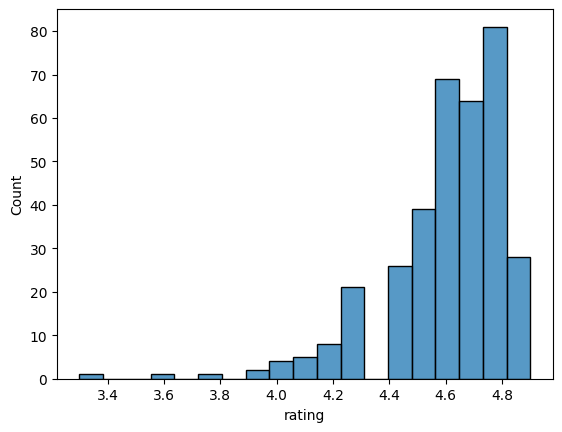

In [8]:
sns.histplot(data = df,
             x= "rating")

<Axes: xlabel='rating', ylabel='Count'>

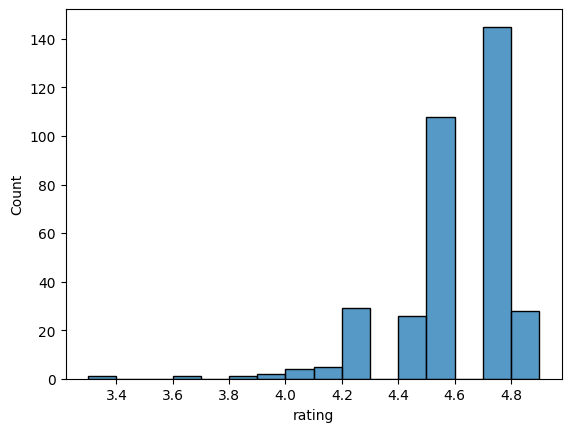

In [9]:
sns.histplot(data = df,
             x= "rating",
             binwidth=.1)

In [10]:
df.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [11]:
df["year"] = df["year"].astype("Int32")

In [12]:
df.dtypes

name       object
author     object
rating    float64
year        Int32
genre      object
dtype: object

In [13]:
df["genre"].isin(["Fiction", "Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [14]:

df.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [15]:
df["year"].min()


np.int32(2009)

In [16]:
df["year"].max()

np.int32(2019)

<Axes: xlabel='year'>

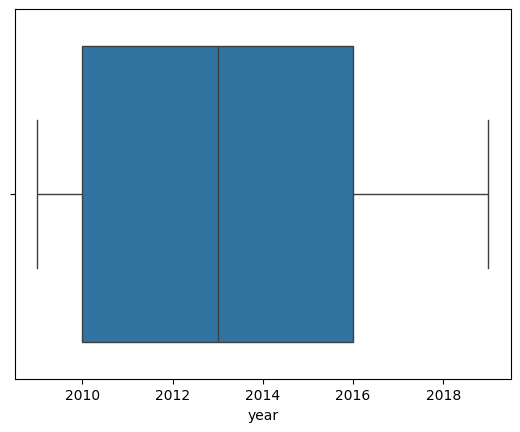

In [17]:
sns.boxplot(data = df, x = "year")


<Axes: xlabel='year', ylabel='genre'>

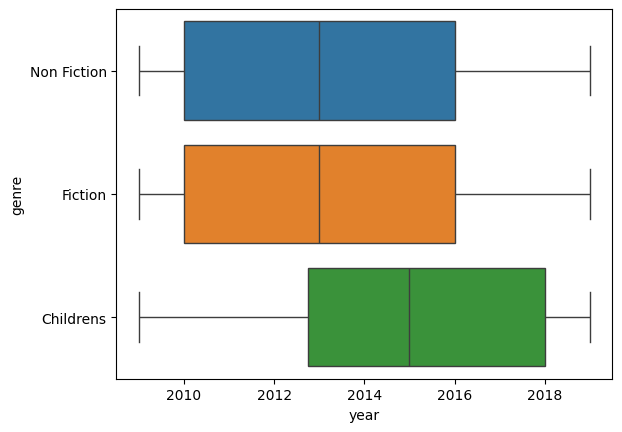

In [18]:
sns.boxplot(data = df, x = "year", 
            y = "genre",
            hue= "genre")

In [19]:
df.groupby("genre").mean(numeric_only=True)

,rating,year
genre,,
Childrens,4.780000,2015.075
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [20]:
df.select_dtypes("number").agg(["mean", "std"]) # bu yerda agg funksiya faqat numriclar bilan ishlaydi

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [21]:
df.agg({"rating": ["mean", 'std'], "year":["median"]}) # keraklilarini ozimiz tanlemiz

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [22]:
df.agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", 'std'),
    median_year=("year", "median"))

,rating,year
mean_rating,4.608571,NaN
std_rating,0.226941,NaN
median_year,NaN,2013.0


<Axes: xlabel='genre', ylabel='rating'>

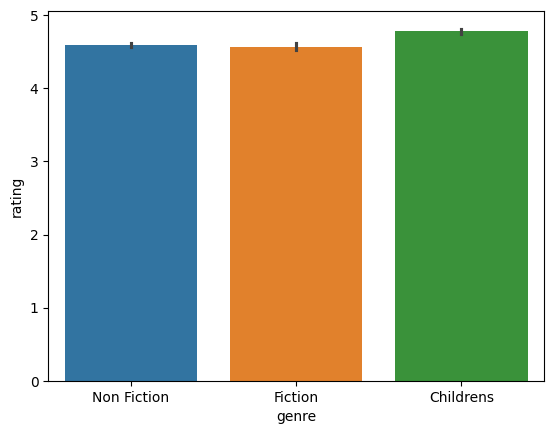

In [23]:
sns.barplot(data= df, x= "genre", y= "rating",
            hue = "genre")

In [24]:
divorse = pd.read_csv("divorce.csv")
divorse.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [25]:
divorse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2205 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB


In [26]:
divorse.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

In [27]:
divorse = pd.read_csv("divorce.csv", parse_dates=["marriage_date"])

In [28]:
divorse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   divorce_date       2209 non-null   object        
 1   dob_man            2209 non-null   object        
 2   education_man      2205 non-null   object        
 3   income_man         2209 non-null   float64       
 4   dob_woman          2209 non-null   object        
 5   education_woman    2209 non-null   object        
 6   income_woman       2209 non-null   float64       
 7   marriage_date      2209 non-null   datetime64[ns]
 8   marriage_duration  2209 non-null   float64       
 9   num_kids           1333 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 172.7+ KB


In [29]:
divorse["marriage_date"] = pd.to_datetime(divorse["marriage_date"])

In [30]:
divorse.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [31]:
# divorse["marriage_date"] = pd.to_datetime(divorse[["month", "day", "year"]])

In [32]:
divorse["marriage_month"] = divorse["marriage_date"].dt.month
divorse.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8


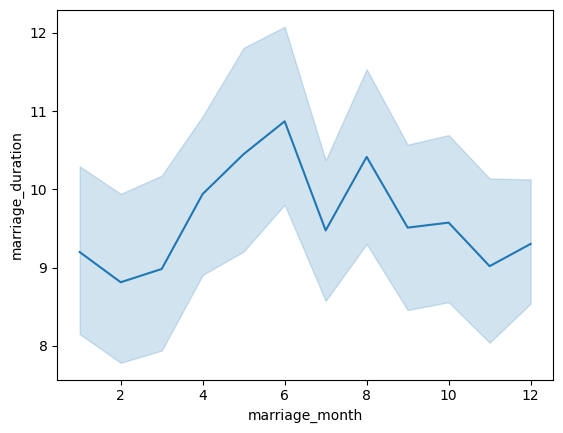

In [33]:
sns.lineplot(data = divorse, x= "marriage_month", y= "marriage_duration")
plt.show()

In [34]:
divorse.corr(numeric_only=True)

,income_man,income_woman,marriage_duration,num_kids,marriage_month
income_man,1.000000,0.318047,0.085321,0.040848,0.013652
income_woman,0.318047,1.000000,0.078677,-0.018015,0.041441
marriage_duration,0.085321,0.078677,1.000000,0.447358,0.001433
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.000551
marriage_month,0.013652,0.041441,0.001433,-0.000551,1.000000


<Axes: >

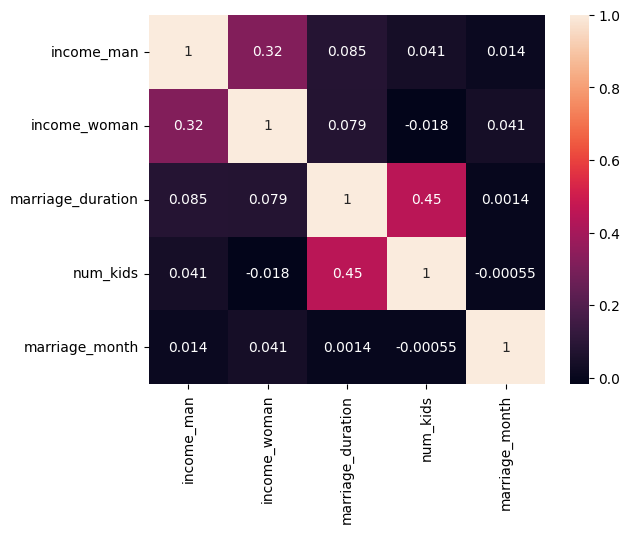

In [35]:
sns.heatmap(divorse.corr(numeric_only=True), annot=True)

<Axes: xlabel='income_man', ylabel='income_woman'>

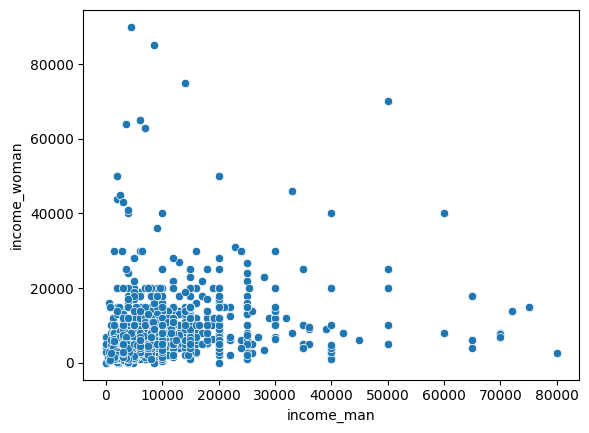

In [36]:
sns.scatterplot(divorse, x= "income_man", 
                y= "income_woman")

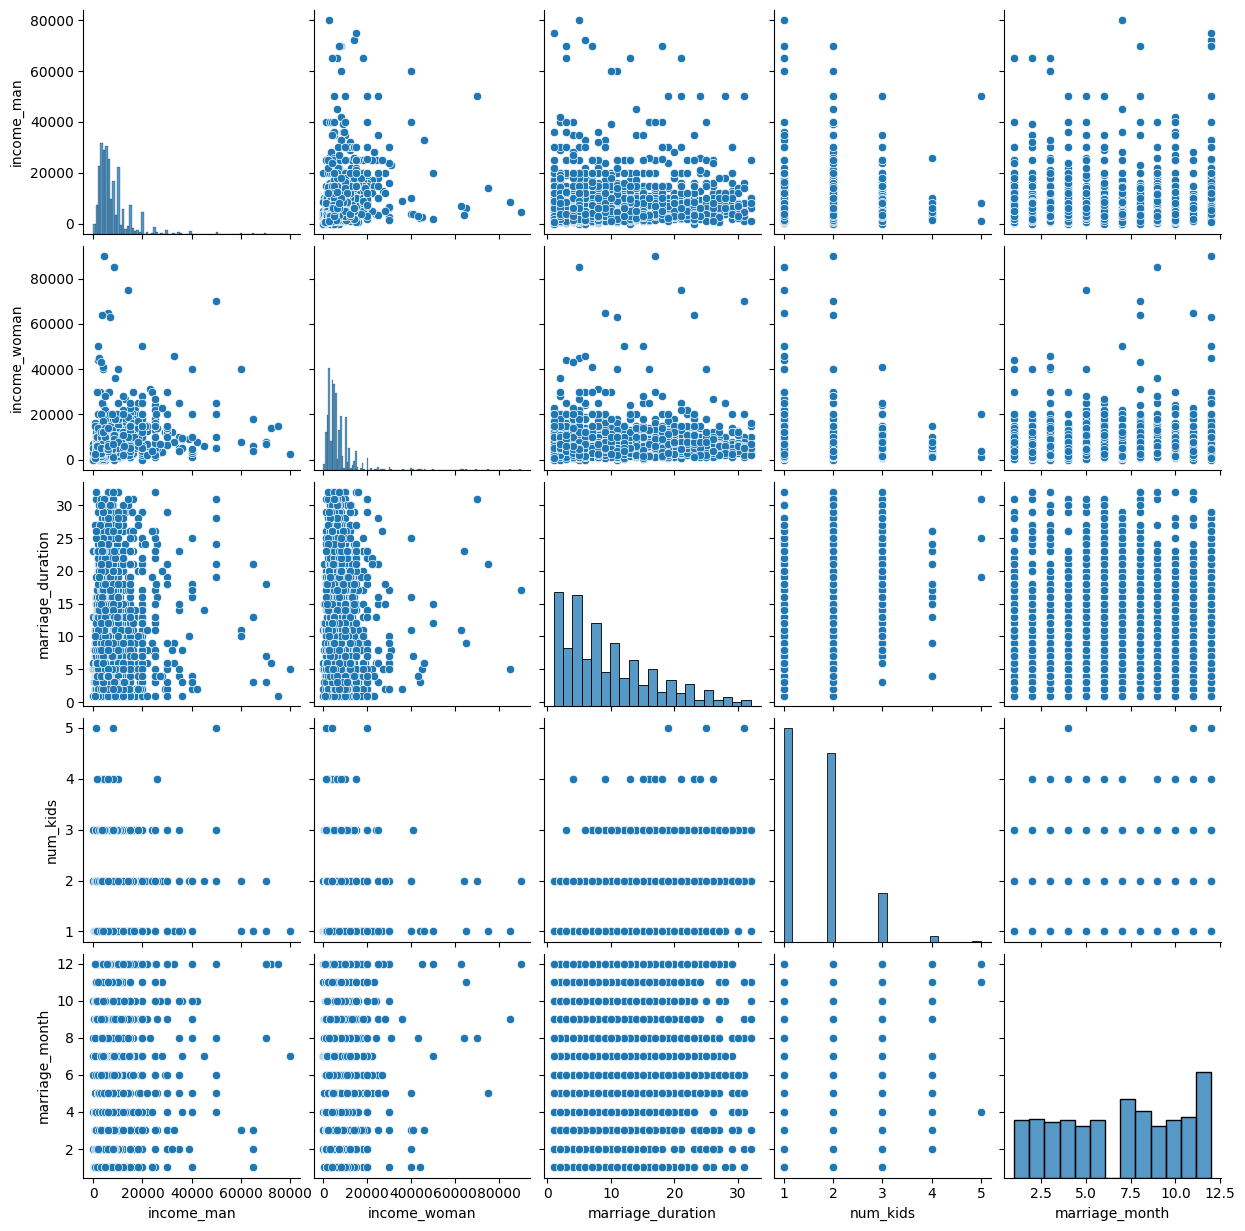

In [37]:
sns.pairplot(data = divorse)

In [38]:
planes = pd.read_csv("planes.csv")
planes.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [39]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [40]:
planes.isnull().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [41]:
planes["Destination"].value_counts()

Destination
Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: count, dtype: int64

In [42]:
planes["Destination"].value_counts(normalize=True)

Destination
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: proportion, dtype: float64

In [43]:
pd.crosstab(planes["Source"], planes["Destination"])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


In [44]:
pd.crosstab(planes["Source"], planes["Destination"], values=planes["Price"], aggfunc="median")

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


In [45]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


<Axes: >

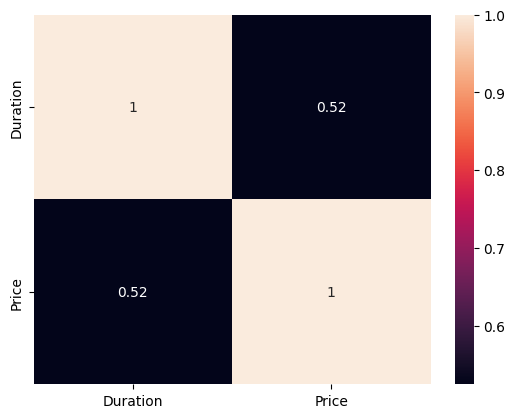

In [46]:
planes["Duration"] = pd.to_timedelta(planes["Duration"]).dt.total_seconds() /60
sns.heatmap(planes[["Duration", "Price"]].corr(), annot = True)

In [47]:
planes["Duration"] 

0        1140.0
1         325.0
2         285.0
3         145.0
4         930.0
          ...  
10655     150.0
10656     155.0
10657     180.0
10658     160.0
10659     500.0
Name: Duration, Length: 10660, dtype: float64

In [48]:
planes["Total_Stops"]

0         2 stops
1          1 stop
2          1 stop
3        non-stop
4          1 stop
           ...   
10655    non-stop
10656    non-stop
10657    non-stop
10658    non-stop
10659     2 stops
Name: Total_Stops, Length: 10660, dtype: object

In [49]:
planes.loc[planes["Total_Stops"] == "non-stop", "Total_Stops"]==0

3        False
9        False
10       False
12       False
20       False
         ...  
10654    False
10655    False
10656    False
10657    False
10658    False
Name: Total_Stops, Length: 3411, dtype: bool

In [50]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140.0,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325.0,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285.0,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,145.0,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,930.0,1 stop,In-flight meal not included,11087.0


In [51]:
stop_mapping={'non-stop':0,
              '1 stop':1,
              '2 stops':2,
              '3 stops':3,
              '4 stops':4
}
planes['Total_Stops_mapped'] = planes['Total_Stops'].map(stop_mapping)


In [52]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Total_Stops_mapped
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140.0,2 stops,No info,13882.0,2.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325.0,1 stop,No info,6218.0,1.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285.0,1 stop,No info,13302.0,1.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,145.0,non-stop,No info,3873.0,0.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,930.0,1 stop,In-flight meal not included,11087.0,1.0


In [61]:
a= np.array([85,90,76,88,95,78,92,81,100,77,84,95])
a.mean()

np.float64(86.75)

In [63]:
lst = [85,90,76,88,95,78,92,81,100,77,84,95]
s=0
for i in lst:
    s+= (86.8-i)**2
s/=11
s**=0.5
s


7.875624073395996